In [1]:
import os

os.chdir('/pi/zhiping.weng-umw/data/ramirezc/splice-benchmark/pangolin')

import matplotlib.pyplot as plt
import numpy as np
from pickle_serialize import save, load
from gene_centric_acceptor_donor_agnostic_gencode_evaluator import GencodeSpliceSiteEvaluator

In [2]:
print("Initializing evaluator...")

# Initialize evaluator
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf=os.path.join("..", "data", "gencode.v47.basic.annotation.gtf"),
    fasta_file=os.path.join("..", "data", "GRCh38.primary_assembly.genome.fa")
)

print("Parsing GENCODE GTF...")

# Get ground truth
ground_truth = evaluator.parse_gencode()

# print("Generating predictions...")

# # Generate predictions
# pangolin_predictions = evaluator.generate_predictions(ground_truth)

# print("Serializing predictions...")

# # Save predictions
# save(pangolin_predictions, "pangolin_splice_predictions")

print("Loading predictions...")

# Load and trim predictions to gene regions
trimmed_pangolin_predictions = evaluator.load_predictions("pangolin_splice_predictions.pkl")

print("Calculating metrics...")

# Calculate metrics
precision, recall, auprc, top_k = evaluator.calculate_metrics(ground_truth, trimmed_pangolin_predictions)

Initializing evaluator...
Parsing GENCODE GTF...


INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'level', 'tag', 'exon_number', 'exon_id', 'transcript_support_level', 'hgnc_id', 'ont', 'havana_gene', 'havana_transcript', 'protein_id', 'ccdsid']


(5809, 25)
     seqname  source     feature   start     end  score strand  frame  \
151     chr1  HAVANA  transcript   65419   71585    NaN      +      0   
1023    chr1  HAVANA  transcript  923923  944574    NaN      +      0   
1038    chr1  HAVANA  transcript  923923  944574    NaN      +      0   
1053    chr1  HAVANA  transcript  925731  944574    NaN      +      0   
1088    chr1  HAVANA  transcript  960584  965719    NaN      +      0   

                 gene_id      transcript_id  ...  \
151    ENSG00000186092.7  ENST00000641515.2  ...   
1023  ENSG00000187634.13  ENST00000616016.5  ...   
1038  ENSG00000187634.13  ENST00000618323.5  ...   
1053  ENSG00000187634.13  ENST00000342066.8  ...   
1088  ENSG00000187961.15  ENST00000338591.8  ...   

                                                    tag exon_number exon_id  \
151   RNA_Seq_supported_partial,basic,Ensembl_canoni...                       
1023  CAGE_supported_TSS,RNA_Seq_supported_partial,b...                       


/tmp/ipykernel_3669646/890653412.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_3669646/890653412.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("results/auprc_topk_pangolin.png", dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


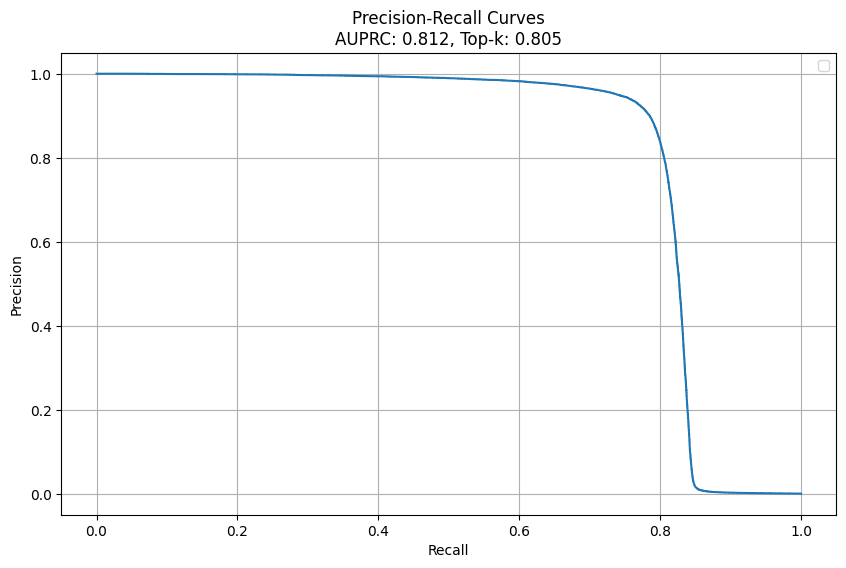

In [3]:
# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nAUPRC: {auprc:.3f}, Top-k: {top_k:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("results/auprc_topk_pangolin.png", dpi=300)
plt.show()

In [ ]:
# truth_sites = ground_truth['chr1'][962470-20:962470+20]
# pred_sites = trimmed_pangolin_predictions['chr1'][962470-20:962470+20]

# print(truth_sites)
# print(pred_sites)